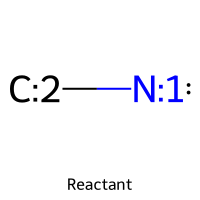

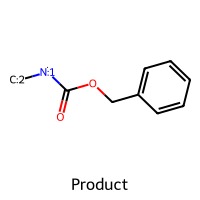

[15:49:20] non-ring atom 2 marked aromatic
[15:49:20] non-ring atom 3 marked aromatic
[15:49:20] non-ring atom 1 marked aromatic


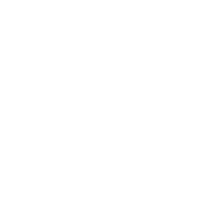

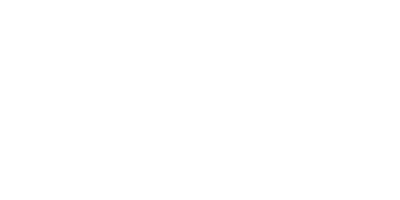

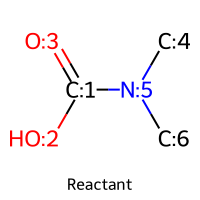

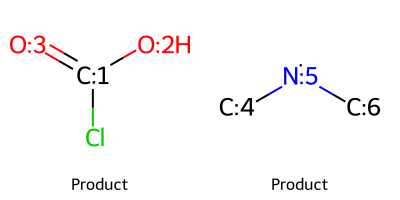

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw


# 定义反应模板
reaction_smarts_list = ["[C:2]-[NH2;D1;+0:1]>>O=C(-O-C-c1:c:c:c:c:c:1)-[NH;D2;+0:1]-[C:2]",
    "[#16;a:4]:[c:3]-[C;H0;D3;+0:1](=[O;D1;H0:2])-[NH;D2;+0:5]-[c:6]>>O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3]:[#16;a:4].[NH2;D1;+0:5]-[c:6]",
    "[#8:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[N;H0;D3;+0:5](-[C:4])-[C:6]>>Cl-[C;H0;D3;+0:1](-[#8:2])=[O;D1;H0:3].[C:4]-[NH;D2;+0:5]-[C:6]"]


# 绘制反应模板
def draw_reaction(reaction):
    # 获取反应物和产物的 SMILES
    reactants = reaction.GetReactants()
    products = reaction.GetProducts()
    
    # 绘制反应物
    reactant_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(mol)) for mol in reactants]
    reactant_image = Draw.MolsToGridImage(reactant_mols, molsPerRow=len(reactant_mols), subImgSize=(200, 200), legends=["Reactant"] * len(reactant_mols))
    
    # 绘制产物
    product_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(mol)) for mol in products]
    product_image = Draw.MolsToGridImage(product_mols, molsPerRow=len(product_mols), subImgSize=(200, 200), legends=["Product"] * len(product_mols))
    
    # 显示图像
    display(reactant_image)
    display(product_image)

# 调用绘制函数
for smarts in reaction_smarts_list:
    reaction = AllChem.ReactionFromSmarts(smarts)
    draw_reaction(reaction)